In [36]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt 
import string

### 1) 2D Image transformation

In [55]:
#points a, b, and c: Homogenous coordinates in Projective space P2.
a,b,c,d = (0,0,1), (0,1,1), (1,1,1), (1,0,1)

#matrix with row vectors of points arranged
P = np.array( [a, b, c, d] ).T 
print(P)

#H = np.identity(3)
#H[0,0] = 2
#H[1,1] = 2
#H[2,0] = 0.3
#H[2,1] = 0.5

#transform 1
#rotating angle
t = np.pi/3
H1 = [[2*np.cos(t), 2*np.sin(t), 0.], [-2*np.sin(t), 2*np.cos(t), 0.], [0., 0., 1.]] #Homography
#H1 = H1*2
print(H1)

Pt1 = np.matmul(H1, P)

P = P/P[-1, :]
P = np.insert(P,4,P[:,0],axis=1)
x = P[0, :]
y = P[1, :]

Pt1 = Pt1/Pt1[-1, :] #divide by bottom row to get cartesian
#print(Pt1)
Pt1 = np.insert(Pt1,4,Pt1[:,0],axis=1)
print(Pt1)

#transformed x,y coordinates
xt1 = Pt1[0, :]
yt1 = Pt1[1, :]


[[0 0 1 1]
 [0 1 1 0]
 [1 1 1 1]]
[[1.0000000000000002, 1.7320508075688772, 0.0], [-1.7320508075688772, 1.0000000000000002, 0.0], [0.0, 0.0, 1.0]]
[[ 0.          1.73205081  2.73205081  1.          0.        ]
 [ 0.          1.         -0.73205081 -1.73205081  0.        ]
 [ 1.          1.          1.          1.          1.        ]]


In [47]:
#transform2
P = np.array( [a, b, c, d] ).T 
H2 = np.identity(3)
H2[0,0],H2[1,1],H2[2,0],H2[2,1] =(2,2,0.3,0.5)
print(H2) 
Pt2 = np.matmul(H2, P)
Pt2 = Pt2/Pt2[-1, :]
Pt2 = np.insert(Pt2,4,Pt2[:,0],axis=1)
xt2 = Pt2[0, :]
yt2 = Pt2[1, :]

[[2.  0.  0. ]
 [0.  2.  0. ]
 [0.3 0.5 1. ]]


In [48]:
#transform3- shear in x and y
P = np.array( [a, b, c, d] ).T 
H3 = np.identity(3)
t = np.pi/3
H3[0,0],H3[1,1],H3[1,0],H3[0,1] =(1,1,np.tan(t),np.tan(t))
print(H3) 
Pt3 = np.matmul(H3, P)
Pt3 = Pt3/Pt3[-1, :]
Pt3 = np.insert(Pt3,4,Pt3[:,0],axis=1)
xt3 = Pt3[0, :]
yt3 = Pt3[1, :]

[[1.         1.73205081 0.        ]
 [1.73205081 1.         0.        ]
 [0.         0.         1.        ]]


In [50]:
#transform4- reflection
P = np.array( [a, b, c, d] ).T 
H4 = np.identity(3)
t = np.pi/3
H4[0,0],H4[0,1],H4[1,0],H4[0,1] =(-2,2,0,0)
print(H4) 
Pt4 = np.matmul(H4, P)
Pt4 = Pt4/Pt4[-1, :]
Pt4 = np.insert(Pt4,4,Pt4[:,0],axis=1)
xt4 = Pt4[0, :]
yt4 = Pt4[1, :]

[[-2.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [51]:
#transform5- translation
P = np.array( [a, b, c, d] ).T 
H5 = np.identity(3)

H5[0,0],H5[1,1],H5[0,2],H5[1,2] =(1,1,1.5,1.5)
print(H5) 
Pt5 = np.matmul(H5, P)
Pt5 = Pt5/Pt5[-1, :]
Pt5 = np.insert(Pt5,4,Pt5[:,0],axis=1)
xt5 = Pt5[0, :]
yt5 = Pt5[1, :]

[[1.  0.  1.5]
 [0.  1.  1.5]
 [0.  0.  1. ]]


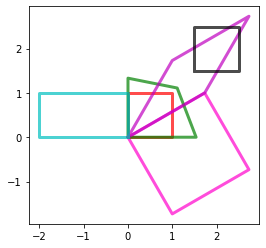

In [56]:
fig, ax = plt.subplots(1,1, sharex=True, sharey=True,)
ax.plot(x, y, color='r', alpha=0.7,
linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')

ax.plot(xt1, yt1, color='#ff00cc', alpha=0.7,
linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')

ax.plot(xt2, yt2, color='g', alpha=0.7,
linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')

ax.plot(xt3, yt3, color='m', alpha=0.7,
linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')

ax.plot(xt4, yt4, color='c', alpha=0.7,
linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')

ax.plot(xt5, yt5, color='k', alpha=0.7,
linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect('equal')

### 2)Transform using given Homography

In [42]:
im1 = cv.imread('../../../Assignments/Assignment2/Graffiti/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('../../../Assignments/Assignment2/Graffiti/img4.ppm', cv.IMREAD_ANYCOLOR)
with open('../../../Assignments/Assignment2/Graffiti/H1to4p') as f:
    H = [[float(x) for x in line.split()] for line in f]
print(H)
H = np.array(H)

#on a larger 1000x1000 canvas
im4_warped = cv.warpPerspective(im4, np.linalg.inv(H), (1000,1000)) #using inverse(H1to4)...transform 4 to 1
im4_warped[0:im1.shape[0], 0:im1.shape[1]] = im1 #copying im1 onto warped_im4: then  two images stiched in the view of img1

cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)

cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4", im4)
cv.waitKey(0)

cv.namedWindow("Image 4 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 4 Warped", im4_warped)
cv.waitKey(0)

cv.destroyAllWindows()

[[0.66378505, 0.68003334, -31.230335], [-0.144955, 0.97128304, 148.7742], [0.00042518504, -1.3930359e-05, 1.0]]


In [12]:
im1 = cv.imread('../../../Assignments/Assignment2/Graffiti/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('../../../Assignments/Assignment2/Graffiti/img5.ppm', cv.IMREAD_ANYCOLOR)
with open('../../../Assignments/Assignment2/Graffiti/H1to5p') as f:
    H = [[float(x) for x in line.split()] for line in f]
print(H)

H = np.array(H)
im1_warped = cv.warpPerspective(im1, H, (1000,1000)) #using (H1to5)...transform 1, ONTO 5
im1_warped[0:im5.shape[0], 0:im5.shape[1]] = im5

im5_warped = cv.warpPerspective(im5, np.linalg.inv(H), (1000,1000)) #using inverse(H1to5)...transform 5, ONTO 1
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1

cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)

cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5", im5)
cv.waitKey(0)

cv.namedWindow("Image 1 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1 Warped", im1_warped)
cv.waitKey(0)

cv.namedWindow("Image 5 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5 Warped", im5_warped)
cv.waitKey(0)

cv.destroyAllWindows()

[[0.62544644, 0.057759174, 222.01217], [0.22240536, 1.1652147, -25.605611], [0.00049212545, -3.6542424e-05, 1.0]]


In [ ]:
### My functions for imwarped

In [27]:
def mywarped1(im,H,shape):
    imwarped = np.zeros(shape,dtype=np.uint8)
    for channel in range(im.shape[2]):
        for i in range(im.shape[0]):
            for j in range(im.shape[1]):
                    P = np.array( [i,j,1] )
                    trans = np.matmul(np.linalg.inv(H), np.reshape(P, (3,1)) )
                    trans = trans/trans[-1,:]
                    x = int(trans[0][0])
                    if x>=1000:
                        x=999
                    y = int(trans[1][0])
                    if y>=1000:
                        y=999
                    imwarped[x][y][channel] = im[i][j][channel]
    return imwarped

In [28]:
#function2
def mywarped2(im,H,shape):
    warped = np.empty(shape,dtype='uint8')
    h, w = im.shape[0:2]
    indY, indX = np.indices((h,w))  # similar to meshgrid/mgrid

    lin_homg_pts = np.stack((indX.ravel(), indY.ravel(), np.ones(indY.size)))
    trans_lin_homg_pts = H.dot(lin_homg_pts)
    trans_lin_homg_pts /= trans_lin_homg_pts[2,:]

    i=0
    for row in range(im.shape[0]):
        for col in range(im.shape[1]):
                x = trans_lin_homg_pts[0][i]
                y = trans_lin_homg_pts[1][i]
                x,y =map(int,[x,y])
                warped[y][x] = im[row,col]
                i +=1
    return warped

[[0.62544644, 0.057759174, 222.01217], [0.22240536, 1.1652147, -25.605611], [0.00049212545, -3.6542424e-05, 1.0]]


Text(0.5, 1.0, 'image1')

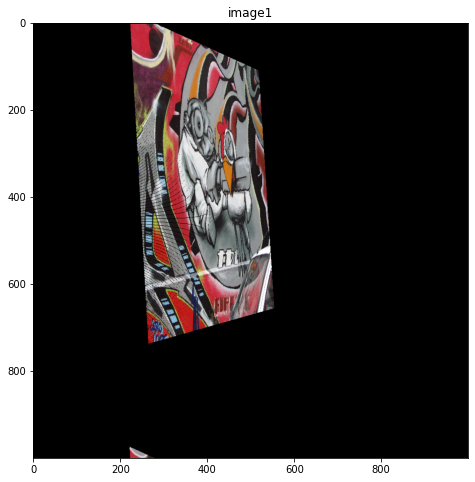

In [30]:
im1 = cv.imread('../../../Assignments/Assignment2/Graffiti/img1.ppm', cv.IMREAD_COLOR)
im5 = cv.imread('../../../Assignments/Assignment2/Graffiti/img5.ppm', cv.IMREAD_COLOR)
with open('../../../Assignments/Assignment2/Graffiti/H1to5p') as f:
    H = [[float(x) for x in line.split()] for line in f]
print(H)

H = np.array(H)
im1_warped = mywarped2(im1, H, (1000,1000,3)) #using (H1to5)...transform 1, ONTO 5

#for c in range(3):
    #im1_warped[0:im5.shape[0], 0:im5.shape[1],c] = im5[:,:,c]
cv.namedWindow("Image 1 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1 Warped", im1_warped)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1,1, sharex=True, sharey=True,figsize=(15,8))
ax.imshow(cv.cvtColor(im1_warped, cv.COLOR_BGR2RGB),vmin=0,vmax=255)
ax.set_title('image1')

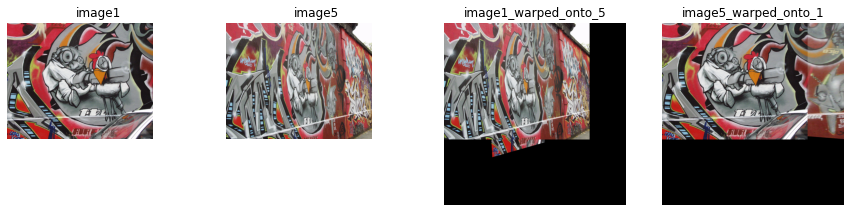

In [13]:
fig, ax = plt.subplots(1,4, sharex=True, sharey=True,figsize=(15,8))
ax[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB),vmin=0,vmax=255)
ax[0].set_title('image1')
ax[0].axis('off')
ax[0].set_aspect('equal')

ax[1].imshow(cv.cvtColor(im5, cv.COLOR_BGR2RGB),vmin=0,vmax=255)
ax[1].set_title('image5')
ax[1].axis('off')
ax[1].set_aspect('equal')

ax[2].imshow(cv.cvtColor(im1_warped, cv.COLOR_BGR2RGB),vmin=0,vmax=255)
ax[2].set_title('image1_warped_onto_5')
ax[2].axis('off')
ax[2].set_aspect('equal')

ax[3].imshow(cv.cvtColor(im5_warped, cv.COLOR_BGR2RGB),vmin=0,vmax=255)
ax[3].set_title('image5_warped_onto_1')
ax[3].axis('off')
ax[3].set_aspect('equal');

### 3)Mouse Clicking to select matching points to stitch, Calculate Homography using opencv, stitch

In [6]:
N = 5
global n
n = 0
p1 = np.empty((N,2))
p2 = np.empty((N,2))
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)
        p[n] = (x,y)
        n += 1

# readin images
im1 = cv.imread('../../../Assignments/Assignment2/Graffiti/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('../../../Assignments/Assignment2/Graffiti/img5.ppm', cv.IMREAD_ANYCOLOR)

im1copy = im1.copy()
im5copy = im5.copy()

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)

param = [p1, im1copy]
cv.setMouseCallback('Image 1',draw_circle, param)

while(1):
    cv.imshow("Image 1", im1copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break

param = [p2, im5copy]
n = 0
cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Image 5',draw_circle, param)

while(1):
    cv.imshow("Image 5", im5copy)
    if n == N:
        break
    if cv.waitKey(20) & 0xFF == 27:
        break
print(p1)
print(p2)



[[194. 279.]
 [487.  60.]
 [527. 224.]
 [629. 412.]
 [381. 465.]]
[[331. 310.]
 [431. 125.]
 [452. 279.]
 [496. 459.]
 [418. 513.]]


In [3]:
#my code: using cv.findHomography
#3rd argument 0- Least Squares method
(H, status) = cv.findHomography(p1, p2,0) #returns the Homography from point set 1 to point set 2.
im5_warped = cv.warpPerspective(im5, np.linalg.inv(H), (1000,1000)) #warping
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1                    #stitching

cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)

cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5", im5)
cv.waitKey(0)

cv.namedWindow("Image 5 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5 Warped", im5_warped)
cv.waitKey(0)
cv.destroyAllWindows()

IndexError: index 5 is out of bounds for axis 0 with size 5

### 4)Homography from own function


In [4]:
def myfindhomog(p1,p2):
    #finds the homograpy between (cartesian 2D point) lists p1 and p2, same size
    #in alligning with opencv notation:
        #p1= source coordinates, p2 = destination coordinates
        #returns homograpgy H, that maps points in 
        #cameraframe1(x1,y1,1) to points in camframe2(x2,y2,1)

    zer = np.zeros((1,3))
    lines= []

    for i in range(0,len(p1)):
        #source: cartesian to P2
        x1_i =np.append(p1[i],1) 

        #destination cartesians
        x2_i =p2[i][0] 
        y2_i =p2[i][1]

        #store to form matrix A 
        l1 = np.append(np.append(zer,-x1_i), y2_i*x1_i)
        l2 = np.append(np.append(x1_i,zer), -x2_i*x1_i)
        lines = lines + [l1] + [l2]

    A = np.array(lines)
    #h = least squares solution for Ah =0--> (A.TA)h=0
    #numpy svd returns in decreasing order
    U,D,Vt = np.linalg.svd( np.matmul(A.T,A) )

    ht = Vt[-1,:]

    #return column H matrix
    return ht.reshape((3,3)) 




In [5]:
#my code: using cv.findHomography
H = myfindhomog(p1, p2) #returns the Homography from point set 1 to point set 2.
im5_warped = cv.warpPerspective(im5, np.linalg.inv(H), (1000,1000)) #warping
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1                    #stitching

cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1", im1)
cv.waitKey(0)

cv.namedWindow("Image 5", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5", im5)
cv.waitKey(0)

cv.namedWindow("Image 5 Warped", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 5 Warped", im5_warped)
cv.waitKey(0)
cv.destroyAllWindows()

In [20]:
a=np.array([1,2,3,4,5,6,7,8,9]).T.reshape((3,3))
print(a)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


### 5a) Running Superglue

In [2]:
import torch
print(torch.__version__)

1.8.0+cpu


In [55]:
npz_path='D:/SEM4 ACA/Sem 4-Tharindu/3- Image Processing and Vision/Assignments/Assignment2/SuperGlue/npzfiles/img1_img5_matches.npz'
npz = np.load(npz_path)
#each npz file contains:
#  [keypoints0], [keypoints1]: arrays containing key points
#  [matches] array: matcharray[i] = the index of [keypoints1] that contains the point matching with keypoints[i]
#  [match_confidence][i] = the confidence level(0-1) for each matching pair.

#Build array to store matching pairs above some confidence interval
thresh = 0.8
arraylen = 0
for i in range(npz['matches'].shape[0]):
    if npz['match_confidence'][i] > thresh:
        arraylen += 1

feature_points0 = np.empty((arraylen,2),dtype='float64')
feature_points1 = np.empty((arraylen,2),dtype='float64')

n=0

for i in range(npz['keypoints0'].shape[0]):
    if npz['matches'][i] > -1:
        if npz['match_confidence'][i] > thresh:
            feature_points0[n]=npz['keypoints0'][i]
            feature_points1[n]=npz['keypoints1'][npz['matches'][i]]
            n +=1

#Run the Homograpy using RANSAC. Then stitch
(H, status) = cv.findHomography(feature_points0, feature_points1,cv.RANSAC,6)
#print(H)

im1 = cv.imread('../../../Assignments/Assignment2/Graffiti/img1.ppm', cv.IMREAD_ANYCOLOR)
im5 = cv.imread('../../../Assignments/Assignment2/Graffiti/img5.ppm', cv.IMREAD_ANYCOLOR)
im5_warped = cv.warpPerspective(im5, np.linalg.inv(H), (1500,1000))
im5_warped_copy = im5_warped.copy()
im5_warped[0:im1.shape[0], 0:im1.shape[1]] = im1
cv.namedWindow("Image 1", cv.WINDOW_AUTOSIZE)
cv.imshow("Image 1",im5_warped)
cv.imwrite('Image1.jpg',im5_warped)
cv.waitKey(0)
cv.destroyAllWindows() 

### 5b)_stitching more than one image
#### Image source: https://github.com/SSARCandy/panoramas-image-stitching/tree/master/input_image/Xue-Mountain-Enterance

In [41]:
def stitch(image1_path,image2_path):
    #stitch image 2 onto image 1 using mouse clicking
    # drawcircle should be predefined
    N = 5
    global n 
    n = 0    
    p1 = np.empty((N,2))
    p2 = np.empty((N,2))

    im1 = cv.imread(image1_path, cv.IMREAD_ANYCOLOR)
    im4 = cv.imread(image2_path, cv.IMREAD_ANYCOLOR)

    im1copy = im1.copy()
    im4copy = im4.copy()

    cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
    param = [p1, im1copy]
    cv.setMouseCallback('Image 1',draw_circle, param)

    while(1):
        cv.imshow("Image 1", im1copy)
        if n == N:
            break
        if cv.waitKey(20) & 0xFF == 27:
            break

    param = [p2, im4copy]
    n = 0
    cv.namedWindow("Image 4", cv.WINDOW_AUTOSIZE)
    cv.setMouseCallback('Image 4',draw_circle, param)

    while(1):
        cv.imshow("Image 4", im4copy)
        if n == N:
            break
        if cv.waitKey(20) & 0xFF == 27:
            break
    
    cv.destroyAllWindows()

    h, status = cv.findHomography(p2, p1) #from p2 to p1
    warped = cv.warpPerspective(im4, h, (1500,1000))
    warped[0:im1.shape[0], 0:im1.shape[1]] = im1
    cv.imwrite('stitch2.jpg',warped)
   

In [34]:
stitch('D:/SEM4 ACA/Sem 4-Tharindu/3- Image Processing and Vision/Assignments/Assignment2/Stitchingsamples/Mountain/mount2.jpg','D:/SEM4 ACA/Sem 4-Tharindu/3- Image Processing and Vision/Assignments/Assignment2/Stitchingsamples/Mountain/mount3.jpg')

In [46]:
stitch('stitch1 - Copy.jpg','D:/SEM4 ACA/Sem 4-Tharindu/3- Image Processing and Vision/Assignments/Assignment2/Stitchingsamples/Mountain/mount4.jpg')

### 5c) Blurring from Laplacian pyramids
### Resource: https://becominghuman.ai/image-blending-using-laplacian-pyramids-2f8e9982077f

In [53]:
def blending (img1,img2,img_stitched):
    import cv2
    import numpy as np

    #Gaussian Pyramids
    #copy image1 in a new variable
    copy_img1=img1.copy()
    #making a list for Gaussian pyramid and its first element is image itself
    gp_img1=[copy_img1] 
    #gaussian pyramid for apple image
    for i in range(5):
        copy_img1=cv2.pyrDown(copy_img1)
        gp_img1.append(copy_img1) #appending the pyr down image to the list of first image
    
    #copy image2 in a new variable
    copy_img2=img2.copy()
    gp_img2=[copy_img2] #making a list for image 2 and its first element is image itself
    #gaussian pyramid for orange image
    for i in range(5):
        copy_img2=cv2.pyrDown(copy_img2)
        gp_img2.append(copy_img2) #appending the pyr down image to the list of second image
    
    #Laplacian pyramids
    copy_img1=gp_img1[4]#assigning the first image list last element to copied variable
    lp_img1=[copy_img1]#again making alist for image one whose first element is the last element of previous list
    #laplacian pyramid for apple image
    for i in range(4,0,-1):
        size=(gp_img1[i-1].shape[1],gp_img1[i-1].shape[0])
        gaussian=cv2.pyrUp(gp_img1[i],dstsize=size)
        laplacian_img1=cv2.subtract(gp_img1[i-1],gaussian)
        lp_img1.append(laplacian_img1)

    #same process with orange image
    copy_img2=gp_img2[4]#assigning the first image list last element to copied variable
    lp_img2=[copy_img2]#again making alist for image one whose first element is the last element of previous list
    #laplacian pyramid for apple image
    for i in range(4,0,-1):
        size=(gp_img2[i-1].shape[1],gp_img2[i-1].shape[0])
        gaussian=cv2.pyrUp(gp_img2[i],dstsize=size)
        laplacian_img2=cv2.subtract(gp_img2[i-1],gaussian)
        lp_img2.append(laplacian_img2)
    
    #now add left and right halves of the images in each level of pyramid
    img1_img2_pyramid=[] #an empty list
    for img1_lap,img2_lap in zip(lp_img1,lp_img2):
        cols,rows,ch=img1_lap.shape
        laplacian=np.hstack((img1_lap[:,0:int(3*cols/4)],img2_lap[:,int(3*cols/4):]))
        img1_img2_pyramid.append(laplacian)
    
    #now reconstruct
    img1_img2_reconstruct=img1_img2_pyramid[0]
    for i in range(1,5):
        size=(img1_img2_pyramid[i].shape[1],img1_img2_pyramid[i].shape[0])
        img1_img2_reconstruct=cv2.pyrUp(img1_img2_reconstruct,dstsize=size)
        img1_img2_reconstruct=cv2.add(img1_img2_pyramid[i],img1_img2_reconstruct)
 
    cv2.imshow("img1",img1)
    cv2.imshow("img2",img2)
    cv2.imshow("img1_img2_reconstruct",img1_img2_reconstruct)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return img1_img2_reconstruct

In [54]:
im5_warped = cv.warpPerspective(im5, np.linalg.inv(H), (1500,1000))
im1_with_padding=np.array(np.zeros_like(im5_warped))
im1_with_padding[0:im1.shape[0], 0:im1.shape[1]] = im1
im1_im5_stitched=im5_warped.copy()

blending(im1_with_padding,im5_warped,im5_warped)

array([[[215, 209, 219],
        [215, 206, 216],
        [211, 202, 213],
        ...,
        [161, 161, 188],
        [168, 170, 192],
        [174, 176, 194]],

       [[213, 206, 218],
        [217, 210, 221],
        [220, 209, 221],
        ...,
        [160, 159, 188],
        [164, 164, 189],
        [166, 167, 188]],

       [[215, 210, 222],
        [216, 210, 222],
        [216, 206, 219],
        ...,
        [158, 156, 186],
        [158, 158, 186],
        [159, 158, 186]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [15]:

print(im1.shape)

(640, 800, 3)


In [19]:
a=np.array([[1,2],[3,4]])
b=np.array([[2,2]])
ab = np.matmul(a,b.T)
print(ab[0][0])
print(ab[1][0])

6
14
